## Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting google drive and importing data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/parkinsons.data")

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df['status'].value_counts()

,count
status,
1,147
0,48


In [9]:
updated_df = df.copy().drop(columns=['name', 'status'], axis=1)

In [10]:
updated_df.shape

(195, 22)

## Getting the target variable and important features and transforming the data




In [11]:
y = df['status']

In [12]:
X = df[['spread1', 'PPE', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'D2']]

In [13]:
X.head()

,spread1,PPE,HNR,MDVP:Fo(Hz),MDVP:Flo(Hz),D2
0,-4.813031,0.284654,21.033,119.992,74.997,2.301442
1,-4.075192,0.368674,19.085,122.400,113.819,2.486855
2,-4.443179,0.332634,20.651,116.682,111.555,2.342259
3,-4.117501,0.368975,20.644,116.676,111.366,2.405554
4,-3.747787,0.410335,19.649,116.014,110.655,2.332180


In [14]:
X.shape

(195, 6)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit_transform(X)

array([[ 0.80132308,  0.86888575, -0.19322537, -0.82929965, -0.95203729,
        -0.21053082],
       [ 1.47985265,  1.80360503, -0.63450828, -0.77097169, -0.05772056,
         0.27507712],
       [ 1.14144541,  1.40266141, -0.27976031, -0.90947638, -0.10987483,
        -0.10362861],
       ...,
       [-1.01415428, -0.83241014, -0.90679887,  0.49557839, -0.96839309,
         0.78033848],
       [-0.97496019, -0.92610456, -0.64923282,  1.07876114, -0.95417967,
        -0.63700298],
       [-0.03647134, -0.64505466, -0.15335586,  1.45481664, -0.88348115,
         0.45480231]])

The scaler transformation using StandardScalar from scikit-learn to make sure the features are on the same scale. The transformation gets standardises values as shown above to ensure SVC model values with smaller and large magnitude are treated equally.

## Splitting the dataset into training and testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

The train and test data is split in 80-20 ratio as there are only 197 records. Since the number of records is low, we do not split into a validation set as that might lead to insufficient training data for the model.

## Transforming the training and test data

## Defining Support Vector model SVC

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

Training the model

In [19]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
train_pred = svc.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score
train_acc = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_roc_auc_score = roc_auc_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_roc_curve = roc_curve(y_train, train_pred)

In [22]:
print(f"The training data accuracy is : {np.round(train_acc, 2)}")
print(f"The training data precision is : {np.round(train_precision, 2)}")
print(f"The training data recall is : {np.round(train_recall, 2)}")
print(f"The training data f1-score is : {np.round(train_f1, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score, 2)}")

The training data accuracy is : 0.88
The training data precision is : 0.88
The training data recall is : 0.97
The training data f1-score is : 0.92
The training data ROC curve is : [[0.   0.42 1.  ]
 [0.   0.97 1.  ]
 [ inf 1.   0.  ]]
The training data ROC-AUC score is : 0.78


*   The accuracy of the SVC baseline model is 0.88. However, since the classes
are not balanced, accuracy can be a misleading measure. Hence, F1 score and and ROC-AUC score were calculated.

*   The F1 score considers both precision and recall into account, and the F1 score of the SVC model (0.92) shows that the rate of false negatives is low.

*   The ROC-AUC score on the other hand, evaluates the model performance for the binary classification model. However, the 0.78 ROC-AUC score means, the model is able to distinguish positive and negative instances only 78% of the time which means the model is not making random predictions.


In [23]:
from sklearn.metrics import auc, RocCurveDisplay
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(train_fpr, train_tpr)

In [24]:
print("False Positive Rate: ", train_fpr)
print("True Positive Rate: ", train_tpr)
print("Thresholds: ", train_thresholds)
print("AUC: ", train_roc_auc)

False Positive Rate:  [0.         0.42105263 1.        ]
True Positive Rate:  [0.         0.97457627 1.        ]
Thresholds:  [inf  1.  0.]
AUC:  0.7767618198037467


* The threshold value goes from infinity to 1 to 0 which means the no positives were predicted at first, then 1 suggests correct prediction but moving to 0 suggests all the instances were predicted positive.

* The FPR value goes from 0 to 0.42 to 1 which suggests no false positives were predicted at first, the second value 0.42 suggests 42% of the negative samples were misclassified as positive and finally the 1 suggests all negatives were incorrectly classified as positives.

* The TPR value goes from 0 to 0.97 to 1 which suggests no true positives were predicted at first, the second value 0.97 suggests 97% of the positive samples were classified correctly and finally the 1 suggests all positives were correctly classified as positives.



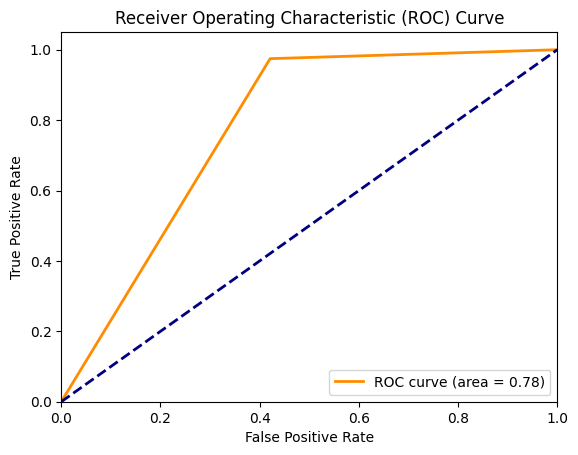

In [ ]:
plt.figure()
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

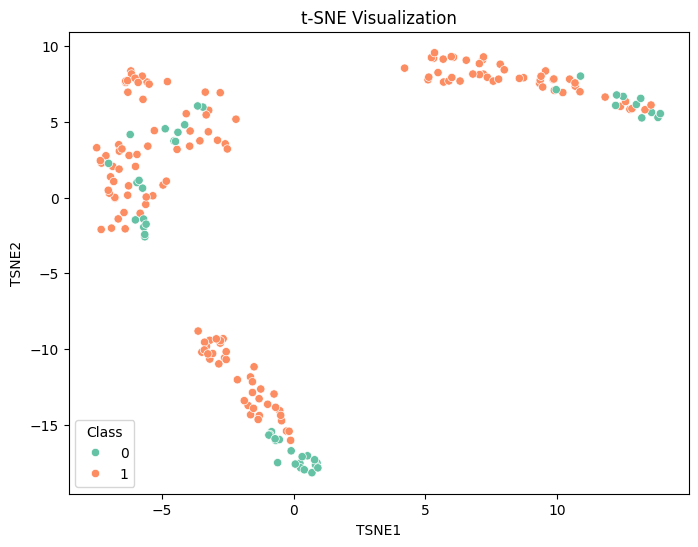

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

## Analysing model performance

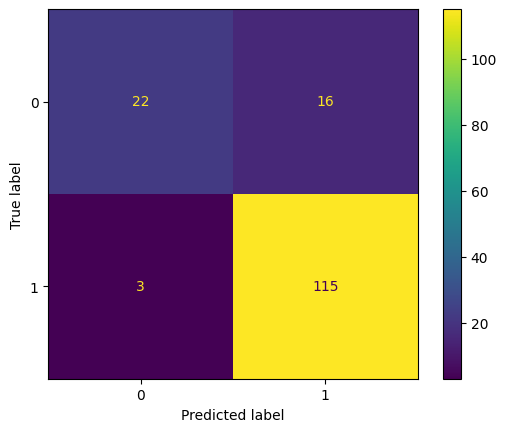

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_va_dt = confusion_matrix(y_train, train_pred)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_va_dt)

cm_val_dt.plot()
plt.show()


*   The confusion matrix gives us further understanding of low ROC-AUC score of 0.78. 16 of the negatives have been incorrectly classified as positive. This explains the SVC model trained, is ideal for making correct predictions for only 56% healthy people.

*   This explains the imbalance in the dataset as well with 75% records for PD patients.



## Considering all the features

In [ ]:
scaler.fit_transform(updated_df)

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(updated_df,y, test_size=0.2, random_state=4)

For the second experiment, we trained the SVC model on entire dataset after removing 'name' column as it would lead to overfitting if we use the ID for each person and the target column 'status' that we predict later using our baseline trained model.

In [ ]:
svc_full = SVC(kernel='linear')

In [ ]:
svc_full.fit(X_train_full, y_train_full)

SVC(kernel='linear')

In [ ]:
train_pred_full = svc_full.predict(X_train_full)

In [ ]:
train_acc_full = accuracy_score(y_train_full, train_pred_full)
train_precision_full = precision_score(y_train_full, train_pred_full)
train_roc_auc_score_full = roc_auc_score(y_train_full, train_pred_full)
train_recall_full = recall_score(y_train_full, train_pred_full)
train_f1_full = f1_score(y_train_full, train_pred_full)
train_roc_curve_full = roc_curve(y_train_full, train_pred_full)

In [ ]:
print(f"The training data accuracy is : {np.round(train_acc_full, 2)}")
print(f"The training data precision is : {np.round(train_precision_full, 2)}")
print(f"The training data recall is : {np.round(train_recall_full, 2)}")
print(f"The training data f1-score is : {np.round(train_f1_full, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve_full, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score_full, 2)}")

The training data accuracy is : 0.9
The training data precision is : 0.89
The training data recall is : 0.99
The training data f1-score is : 0.94
The training data ROC curve is : [[0.   0.42 1.  ]
 [0.   0.99 1.  ]
 [ inf 1.   0.  ]]
The training data ROC-AUC score is : 0.79


However, the results with the entire dataset trained using all the features is not very different from the model trained after feature selection which helps prove the EDA correct and the feature selection as relevant.

In [ ]:
train_fpr_full, train_tpr_full, train_thresholds_full = roc_curve(y_train_full, train_pred_full)
train_roc_auc_full = auc(train_fpr_full, train_tpr_full)

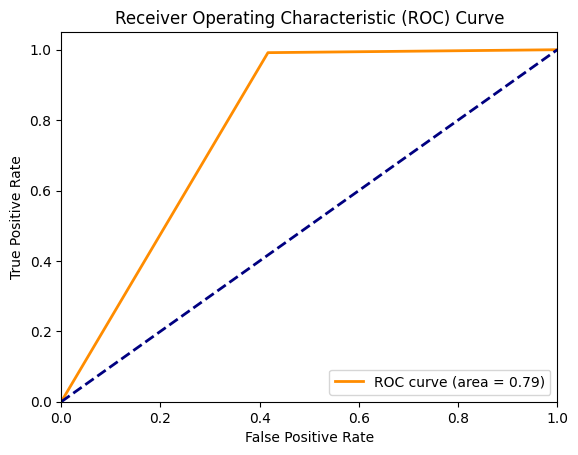

In [ ]:
plt.figure()
plt.plot(train_fpr_full, train_tpr_full, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score_full:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

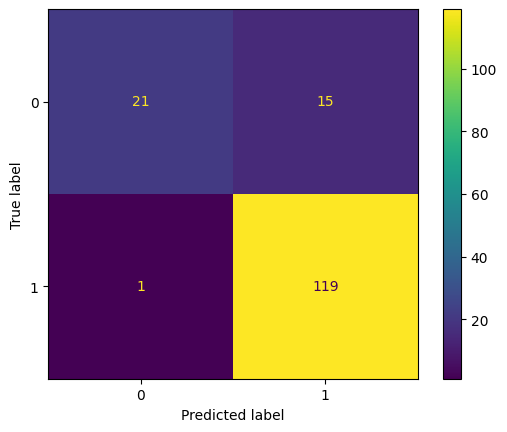

In [ ]:
confusion_matrix_va_dt_full = confusion_matrix(y_train_full, train_pred_full)
cm_val_dt_full = ConfusionMatrixDisplay(confusion_matrix_va_dt_full)

cm_val_dt_full.plot()
plt.show()


*   The confusion matrix gives us further understanding of low ROC-AUC score of 0.79. 15 of the negatives have been incorrectly classified as positive. This explains the SVC model trained, is ideal for making correct predictions for only 58% healthy people.

*   This explains the imbalance in the dataset as well with 75% records for PD patients.



In [ ]:
# # creating the correlation matrix
# plt.figure(figsize=(12, 10))
# mask = np.triu(np.ones_like(updated_df.corr()))
# sns.heatmap(updated_df.corr(),vmin=-1, vmax=1, mask=mask)

## Predicting the test data

In [ ]:
test_preds = svc.predict(X_test)

In [ ]:
test_acc = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_roc_auc_score = roc_auc_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_roc_curve = roc_curve(y_test, test_preds)

In [ ]:
print(f"The test data accuracy is : {np.round(test_acc, 2)}")
print(f"The test data precision is : {np.round(test_precision, 2)}")
print(f"The test data recall is : {np.round(test_recall, 2)}")
print(f"The test data f1-score is : {np.round(test_f1, 2)}")
print(f"The test data ROC curve is : {np.round(test_roc_curve, 2)}")
print(f"The test data ROC-AUC score is : {np.round(test_roc_auc_score, 2)}")

The test data accuracy is : 0.79
The test data precision is : 0.84
The test data recall is : 0.9
The test data f1-score is : 0.87
The test data ROC curve is : [[0.  0.5 1. ]
 [0.  0.9 1. ]
 [inf 1.  0. ]]
The test data ROC-AUC score is : 0.7


In [ ]:
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)
test_roc_auc = auc(test_fpr, test_tpr)

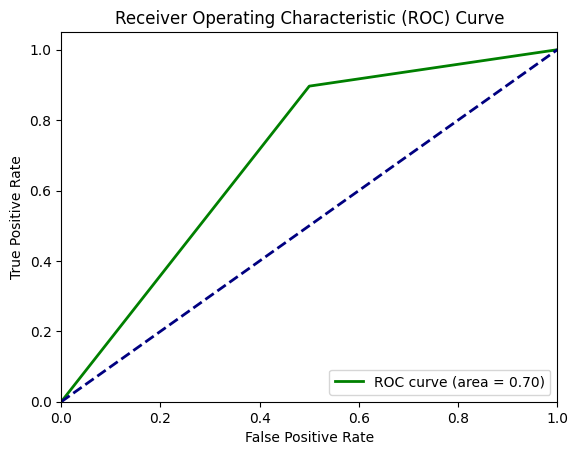

In [ ]:
plt.figure()
plt.plot(test_fpr, test_tpr, color='green', lw=2, label=f'ROC curve (area = {test_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

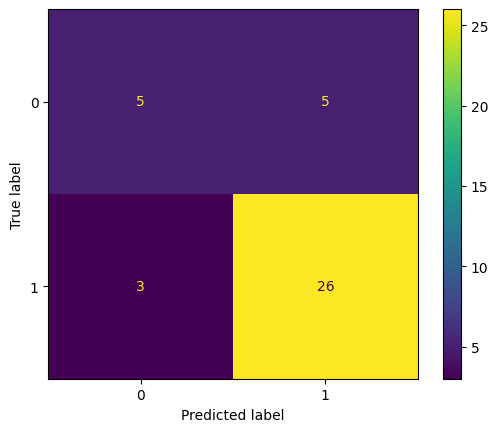

In [ ]:
confusion_matrix_test_dt = confusion_matrix(y_test, test_preds)
cm_test_dt = ConfusionMatrixDisplay(confusion_matrix_test_dt)

cm_test_dt.plot()
plt.show()

Testing the trained model on the data suggests the model makes very good prediction to predict the PD patients, however, it is 50% of the healty people correctly.